In [202]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import time
from tqdm import tqdm
from matplotlib.ticker import AutoMinorLocator
colors = ['crimson','midnightblue', 'violet','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
# random.shuffle(colors)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

**Random number generation**

In [203]:
times = []

span = range(1,10000,1000)

np.random.seed(0)

for i in tqdm(span):
    start_time = time.time()
    np.random.random(i)
    end_time = time.time()
    times.append(end_time - start_time)

#plt.figure(figsize=(9,3))
#plt.errorbar(span,times,label='Time')
#plt.legend()
#plt.xlabel('Numbers generated')
#plt.ylabel('Time taken')

100%|██████████| 10/10 [00:00<00:00, 4992.62it/s]


**Accept/Reject**

In [204]:
def circle(x):
    return np.sqrt(5.2**2 - x**2)

In [205]:
import numpy as np
import matplotlib.pyplot as plt

radius = 5.2

def is_inside_circle(x, y, radius=5.2):
    return x**2 + y**2 < radius**2

def sample_from_box(n_samples, radius=5.2):
    samples = []
    failed_samples = []
    for i in range(n_samples):
        x = np.random.uniform(-radius, radius)
        y = np.random.uniform(-radius, radius)
        if is_inside_circle(x, y, radius):
            samples.append((x, y))
        else:
            failed_samples.append((x,y))
    return np.array(samples),np.array(failed_samples)

n_samples = 500000
samples , failed_samples = sample_from_box(n_samples)

print(f'Analytical is {np.pi*radius**2}')
print(f'Numerical is {((2*radius)**2) * ( (len(samples) / n_samples))}')

Analytical is 84.94866535306801
Numerical is 84.94626816


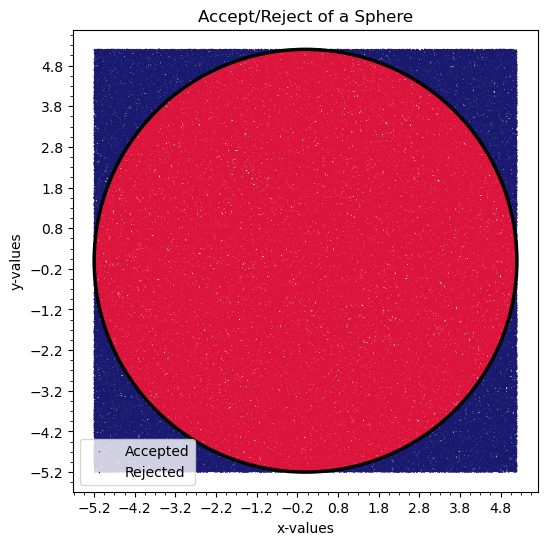

In [206]:
plt.figure(figsize=(6, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=1.,s=0.95, edgecolor='none',label='Accepted')
plt.scatter(failed_samples[:, 0], failed_samples[:, 1], alpha=1.,s=0.95, edgecolor='none',label='Rejected')
circle = Circle((0, 0), radius, color='black', fill=False, linestyle='-', linewidth=2.5)
plt.gca().add_patch(circle)  # Add the circle to the current axes
plt.xlabel('x-values')
plt.ylabel('y-values')
tick_values = np.arange(-5.2, 5.2,1)  # Smaller ticks from -5.2 to 5.2 with a step of 0.5
plt.xticks(tick_values)
plt.yticks(tick_values)
plt.xlim([-radius,radius])
plt.ylim([-radius,radius])
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=2, color='k')
plt.title('Accept/Reject of a Sphere')
plt.axis('equal')  # Ensures the aspect ratio is equal to show the circle properly
plt.legend()
plt.show()

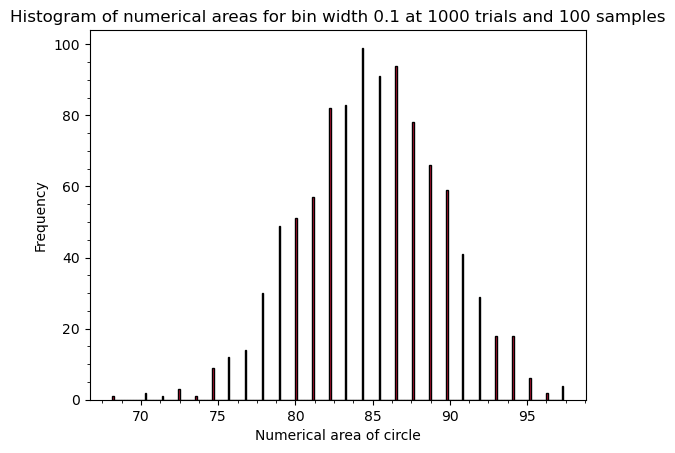

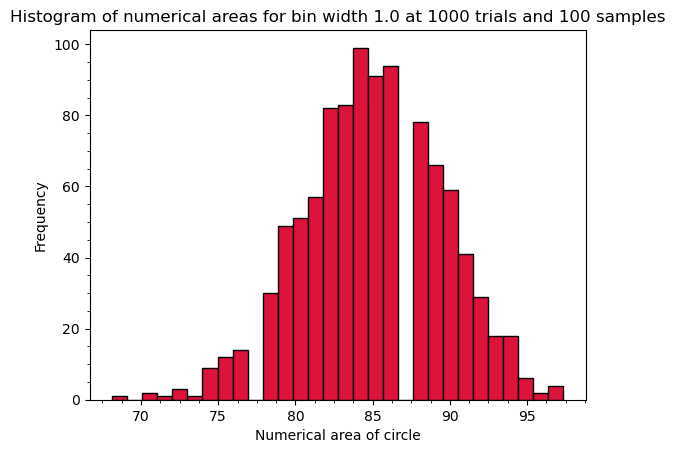

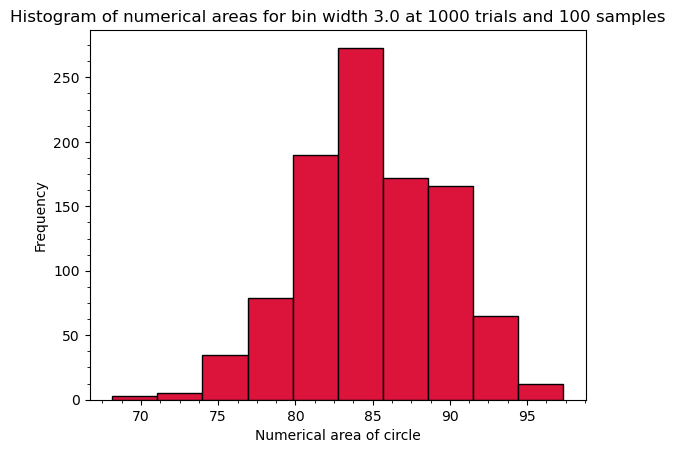

In [208]:
Areas = []
trials = 1000
n_samples = 100

for i in range(trials): # 1000 trials
    samples , failed_samples = sample_from_box(n_samples)
    Areas.append(((2*radius)**2) * ( (len(samples) / n_samples)))

for i in [0.1,1.,3.]:
    data_range = np.max(Areas) - np.min(Areas)
    num_bins = int(np.ceil(data_range / i))
    plt.hist(Areas, bins=num_bins, edgecolor='black')
    plt.title(f'Histogram of numerical areas for bin width {i} at {trials} trials and {n_samples} samples')
    plt.xlabel('Numerical area of circle')
    plt.ylabel('Frequency')
    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.tick_params(which='minor', length=2, color='k')
    plt.show()

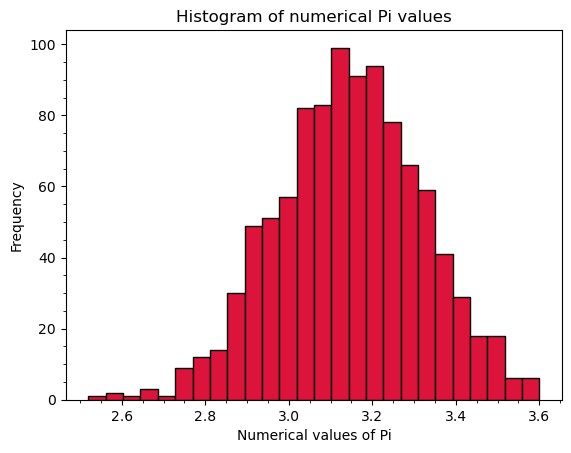

In [209]:
Numerical_Pis = [x/((radius**2)) for x in Areas]
data_range = np.max(Numerical_Pis) - np.min(Numerical_Pis)
num_bins = int(np.ceil(data_range / i))
plt.hist(Numerical_Pis, bins=26, edgecolor='black')
plt.title(f'Histogram of numerical Pi values')
plt.xlabel('Numerical values of Pi')
plt.ylabel('Frequency')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=2, color='k')
plt.show()

In [239]:
PIS = []
throws = range(1000,300000,1000)

for i in tqdm(throws):
    samples , failed_samples = sample_from_box(i)
    num_area = (((2*radius)**2) * ( (len(samples) / i)))
    num_pis = num_area/((radius**2))
    PIS.append(num_pis)

 82%|████████▏ | 244/299 [04:50<01:05,  1.19s/it]


KeyboardInterrupt: 

The mean in the tenth percentile pi value is 3.1419257098712916
True value of pi is 3.141592653589793


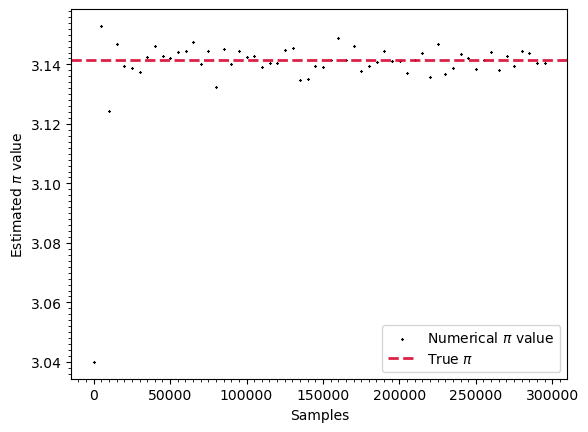

In [ ]:
plt.scatter(throws,PIS,marker='x',color='k',s=0.75,label='Numerical $\pi$ value ')
plt.xlabel('Samples')
plt.ylabel('Estimated $\pi$ value')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.tick_params(which='minor', length=2, color='k')
print(f'The mean in the tenth percentile pi value is {np.mean(PIS[int(len(PIS) * 0.9):])}')
print(f'True value of pi is {np.pi}')
plt.axhline(y=np.pi,alpha=0.95, linestyle='--', linewidth=2,label='True $\pi$')
plt.legend()
plt.show()